## Logistic Regression

This code shows an example of logistic regression. It does optimization with 
a truncated Newton method via the fmin_tnc function from scipy.optimize.

It plots the data and the generated decision boundary line, and gives the 
accuracy score. All training and testing is done on the same data set. 

Data file: ex2data1.txt

### Sigmoid, Cost, Gradient, and Prediction Functions

In [5]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import os


def sigmoid(z):                     # sigmoid funtion for the logistic hypothesis
    return 1 / (1 + np.exp(-z))


def cost(theta, X, y):              # compute the cost function for logistic regression
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))


def gradient(theta, X, y):          # compute the cost function gradient
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
                                    # no gradient descent iterated here:
    return grad                     # only the gradient is returned, to be used by fmin_tnc


def predict(theta, X):                  # predict the classification given X and Theta
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]


### Import, plot, and prepare data

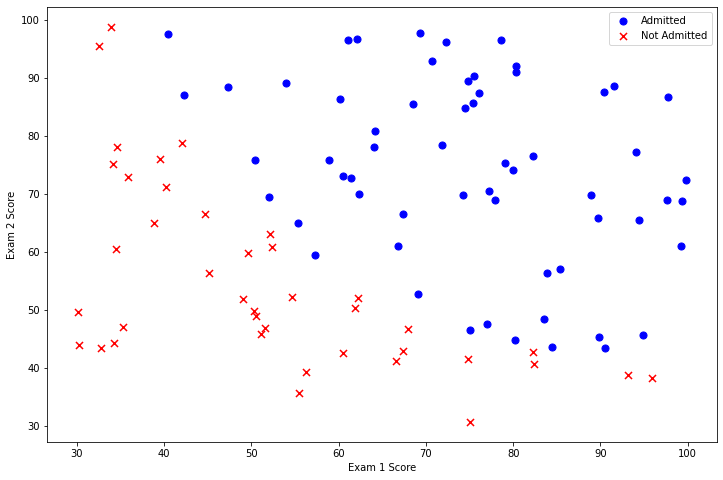

In [10]:
# import the data
path = os.getcwd() + '\ex2data1.txt'  
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])  

# plot the data
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)

### Minimize cost function and find parameters Theta

In [7]:
# minimize the cost function and find the parameters theta, in the first element of result
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y), disp=0) 
# ^ Newton's truncated method is faster than gradient descent
# It works by finding the roots of f'(x) (and thus the minimum) by approximating f'(x) with a linear function (Newton's root finding method) 
print (result)  # three results are returned: the solution (parameters), the number of steps, and the return code (0 means the optimum has been reached) 
print (cost(result[0], X, y))

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)
0.20349770158947425


### Using parameters Theta, calculate prediction accuracy and plot decision boundary 

accuracy = 89.0%


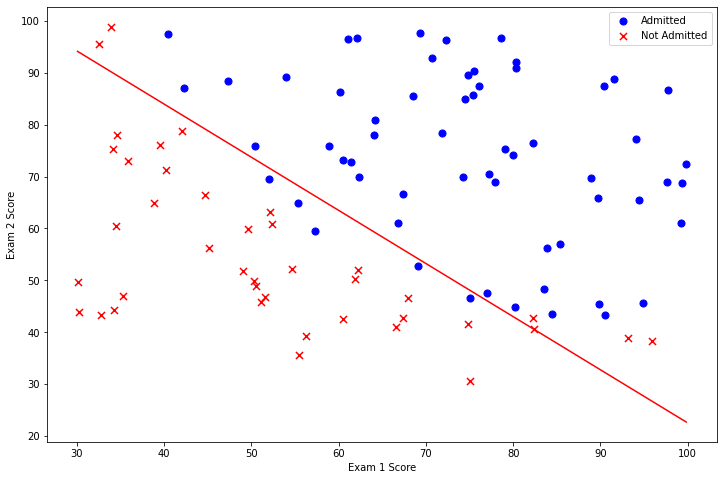

In [9]:
# predict the classification given the parameters and compare it to the actual data values
theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = sum(correct)*100/len(correct)
print ('accuracy = {0}%'.format(accuracy))

# plot the decision boundary 
x = np.linspace(data.Exam1.min(), data.Exam1.max(), 100)
f = -theta_min[0,0]/theta_min[0,2] - theta_min[0,1]*x/theta_min[0,2]
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')
ax.plot(x, f, 'r', label='Decision Boundary') 